In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Archimedean copula

We recall here that an **Archimedean** copula can be expressed using it's generator function $\phi$ such that

\begin{equation}
  C(\textbf{u}) = \phi^{\leftarrow}\left( \phi(u_1) + \dots + \phi(u_d) \right),
\end{equation}

where $\textbf{u} \in [0,1]^d$. The generator $\phi(t)$ is a continuous, decreasing and convex function of $t$, with $\phi(0) = 1$.

#Random number generation from Archimedean Copula

In this section, we show how to generate random numbers from Archimedean copulas which have been implemented in the module.

First, we import the files from the corresponding git using the !git command.

In [2]:
!git clone https://github.com/Aleboul/CoPY/

fatal: destination path 'CoPY' already exists and is not an empty directory.


It is now done, we can import the following files.

In [3]:
from CoPY.copy.bivariate import base
from CoPY.copy.bivariate import archimedean

We propose to simulate a Clayton Copula which can be defined as

\begin{equation}
  C(u,v) = \max \left( u^{-\theta} + v^{-\theta} -1, 0 \right),
\end{equation}

where $\theta \in [-1, \infty) \setminus \{0\}$.

For this copula, we need to initialize it and use the method **sample_unimargin()** for random generation.

In [4]:
copula = archimedean.Clayton(theta = 4.0, n_sample = 1000)
sample = copula.sample_unimargin()

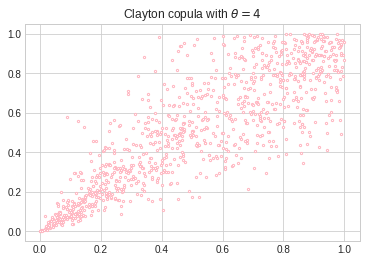

In [5]:
fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'lightpink', color = 'white', s = 5)
ax.set_title(r'Clayton copula with $\theta = 4$')
plt.show()

Now, we propose to simulate the Joe Copula which are defined with the generator function

\begin{equation}
  \phi(t) = - log\left( 1-(1-t)^\theta\right), \quad 0<t<1,
\end{equation}

with $\theta \in [1, \infty)$.

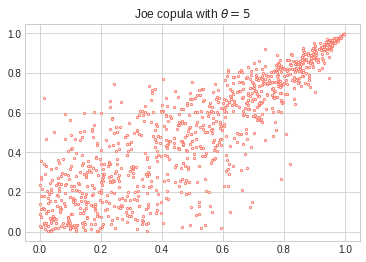

In [6]:
copula = archimedean.Joe(theta = 5.0, n_sample = 1000)
sample = copula.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'salmon', color = 'white', s = 5)
ax.set_title(r'Joe copula with $\theta = 5$')
plt.show()

Last, we generate numbers from the Frank copula where the generator is given by

\begin{equation}
  \phi(t) = -log\left(\frac{exp(-\theta t) - 1}{exp(-\theta)-1}\right), \quad 0 < t < 1,
\end{equation}

with $\theta \in \mathbb{R} \setminus \{0\}$.

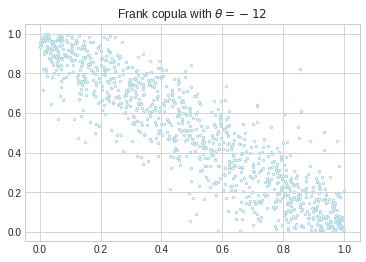

In [7]:
copula = archimedean.Frank(theta = -12, n_sample = 1000)
sample = copula.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'lightblue', color = 'white', s = 5)
ax.set_title(r'Frank copula with $\theta = -12$')
plt.show()

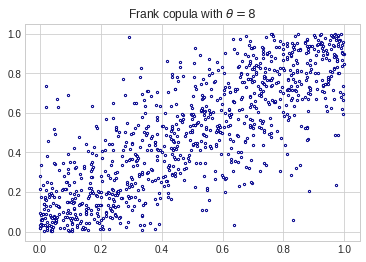

In [8]:
copula = archimedean.Frank(theta = 8, n_sample = 1000)
sample = copula.sample_unimargin()
fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'darkblue', color = 'white', s = 5)
ax.set_title(r'Frank copula with $\theta = 8$')
plt.show()

## Random number generation for multivariate Archimedean copula

Here, we present how to simulate multivariate archimedean copula. For that purpose, we use the algorithm as desbribed in paper [1]. For consistency, we recall the algorithm which can be found in Section 5 of *loc. sit.* ⁉

1.   Generate a random vector $\textbf{S} = (S_1, \dots, S_d)$ uniformly distributed on the $d$-dimensional simplex $\Delta^{d-1}$. 
2.   Generate a univariate random variable $R$ having the radial distribution $F_R$ associated with the generator $\phi^\leftarrow$.
3.   Return $\textbf{U} = (U_1, \dots, U_d)$ where $U_i = \phi^\leftarrow(RS_i)$ for $i = 1,\dots,d$.

The second step is the more tedious part as we require an accurate evaluation of the radial distribution and numerical inversion of $F_R$ to generate $R$. We refer to [2] to obtain those of the most used Archimedean copulas. 





The first we sample from is the Clayton copula. This copula (in high dimension) differs from the others as the parameter $\theta$ can be negative such that $\theta \in [-\frac{1}{(d-1)}, \infty)$.

In [9]:
from CoPY.copy.multivariate import base
from CoPY.copy.multivariate import mv_archimedean

Text(0.5, 0.92, 'Clayton model with $\\theta = 4.0$')

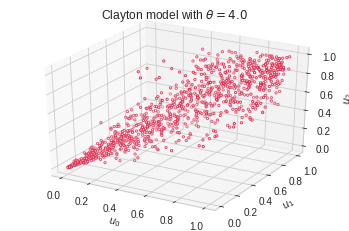

In [10]:
d = 3
theta = 4.0
n_sample = 1000

copula = mv_archimedean.Clayton(theta = theta, d = d, n_sample = n_sample)
sample = copula.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5.0, edgecolor = 'crimson', color = 'white')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Clayton model with $\theta = 4.0$')

Text(0.5, 0.92, 'Clayton model with $\\theta = -1/3$')

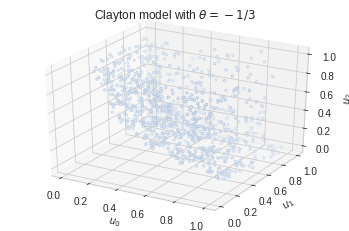

In [11]:
d = 3
theta = -1/3
n_sample = 1000

copula = mv_archimedean.Clayton(theta = theta, d = d, n_sample = n_sample)
sample = copula.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5.0, edgecolor = 'lightsteelblue', color = 'white')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Clayton model with $\theta = -1/3$')

The second considered model is the Joe model with parameter $\theta \in [1, \infty)$.

Text(0.5, 0.92, 'Joe model with $\\theta = 5.0$')

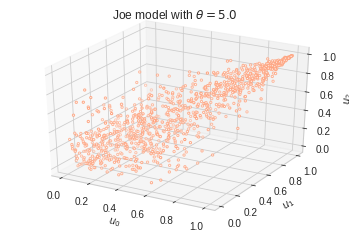

In [12]:
d = 3
theta = 4.0
n_sample = 1000

copula = mv_archimedean.Joe(theta = theta, d = d, n_sample = n_sample)
sample = copula.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5.0, edgecolor = 'lightsalmon', color = 'white')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Joe model with $\theta = 5.0$')

The known radial distribution of the Joe copula is known only for $\theta \in [0,\infty)$.

Text(0.5, 0.92, 'Frank model with $\\theta = 8.0$')

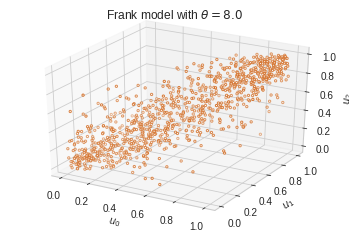

In [13]:
d = 3
theta = 8.0
n_sample = 1000

copula = mv_archimedean.Frank(theta = theta, d = d, n_sample = n_sample)
sample = copula.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5.0, edgecolor = 'chocolate', color = 'white')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Frank model with $\theta = 8.0$')

We know consider the AMH model where the generator function is given by

\begin{equation}
  \phi(t) = log\left[ \frac{1-\theta(1-t)}{t} \right],
\end{equation}

with $\theta \in ]0,1[$.

0.612515547460473
0.999446047968744


Text(0.5, 0.92, 'Amh model with $\\theta = 0.8$')

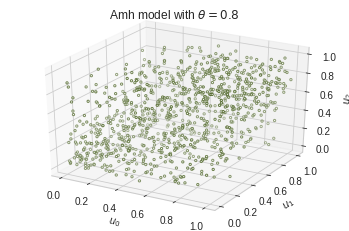

In [14]:
d = 3
theta = 0.8
n_sample = 1000

copula = mv_archimedean.Amh(theta = theta, d = d, n_sample = n_sample)
sample = copula.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5.0, edgecolor = 'darkolivegreen', color = 'white')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Amh model with $\theta = 0.8$')

# Extreme value Copula

A bivariate extreme value copula is characterise by the following relation

\begin{equation}
  C(u,v) = (uv)^{A(log(v) / log(uv))}, \quad (u,v) \in (0,1]^2 \setminus \{(1,1)\},
\end{equation}

where $A : [0,1] \rightarrow [1/2,1]$ is convex and satisfies $t \vee (1-t) \leq A(t) \leq 1$ for all $t \in [0,1]$ is the Pickands dependence function.

## Simulation extreme value copula

First, we propose to simulate an asymmetric logistic copula whose Pickands dependence function is given by

\begin{equation}
  (1-\psi_1)t + (1-\psi_2)(1-t) + \left[ (\psi_1 t)^\theta + (\psi_2 (1-t))^\theta\right]^{1/\theta}, 
\end{equation}

where $\theta \in [1, \infty)$ and $ \psi_1, \psi_2 \in [0,1]$. When $\psi_1 = \psi_2 = 1.0$, we obtain the (symmetric) model of Gumbel.

In [15]:
from CoPY.copy.bivariate import bv_evd 

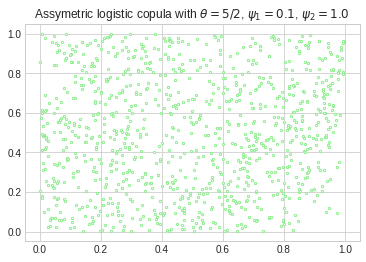

In [16]:
theta, psi1, psi2 = 5/2, 0.1, 1.0
n_sample = 1000

copula = bv_evd.Asy_log(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'lightgreen', color = 'white', s = 5)
ax.set_title(r'Assymetric logistic copula with $\theta = 5/2$, $\psi_1 = 0.1$, $\psi_2 = 1.0$')
plt.show()

Another proposed model is the assymetric negative logistic which is decribed by the following Pickands dependence function:

\begin{equation}
  A(t) = 1-\left[(\psi_1(1-t))^{-\theta} + (\psi_2 t)^{-\theta} \right]^{-1/\theta},
\end{equation}

with $\theta \in [1, \infty)$ and $\psi_1, \psi_2 \in (0,1]$. The special case $\psi_1 = \psi_2 = 1$ returns the (symmetric) model of Galambos.

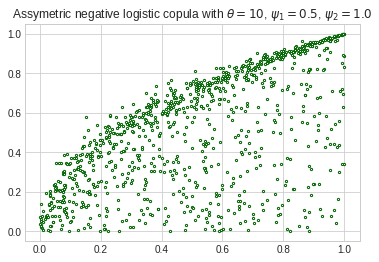

In [17]:
theta, psi1, psi2 = 10, 0.5, 1.0
n_sample = 1000

copula = bv_evd.Asy_neg_log(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'darkgreen', color = 'white', s = 5)
ax.set_title(r'Assymetric negative logistic copula with $\theta = 10$, $\psi_1 = 0.5$, $\psi_2 = 1.0$')
plt.show()

For the third model, we consider the asymmetric mixed model, namely

\begin{equation}
  A(t) = 1 - (\theta + \psi_1)t + \theta t^2 + \psi_1 t^3,
\end{equation}

with parameters $\theta$ and $\psi_1$ satisfying $\theta \geq 0$, $\theta + \psi_1 \leq 1$, $\theta + 2\psi_1 \geq 1$. The special case $\psi_1 = 0$ and $\theta \in [0,1]$ yields the (symmetric mixed model).

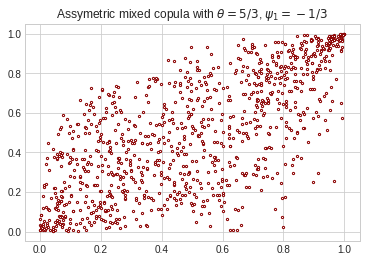

In [18]:
theta, psi1 = 5/3, -1/3
n_sample = 1000

copula = bv_evd.Asy_mix(theta = theta, n_sample = n_sample, psi1 = psi1)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'darkred', color = 'white', s = 5)
ax.set_title(r'Assymetric mixed copula with $\theta = 5/3$, $\psi_1 = -1/3$')
plt.show()

The fourth model is the Hüssler and Reiss model whose Pickands dependence function is 

\begin{equation}
  A(t) = (1-t)\Phi \left( \theta + \frac{1}{2\theta} \log\left(\frac{1-t}{t}\right) \right) + t\Phi\left(\theta + \frac{1}{2\theta} \log\left(\frac{t}{1-t} \right) \right),
\end{equation}

with $\theta \in (0,\infty)$.

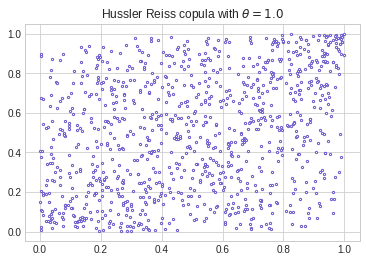

In [19]:
theta = 1.0
n_sample = 1000

copula = bv_evd.Husler_Reiss(theta = theta, n_sample = n_sample)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'slateblue', color = 'white', s = 5)
ax.set_title(r'Hussler Reiss copula with $\theta = 1.0$')
plt.show()

The fifth model is the t-EV in which :

\begin{align*}
  &A(w) = w t_{\chi +1}(z_w) + (1-w)t_{\chi +1}(z_{1-w}), \\
  & z_w = (1+\chi)^{1/2}[{w/(1-w)}^\frac{1}{\chi} - \rho](1-\rho^2)^{-1/2}.
\end{align*}


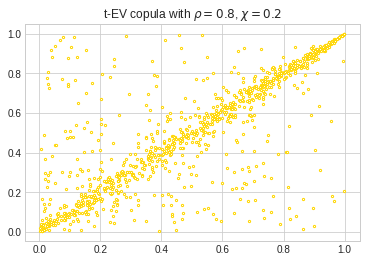

In [20]:
theta, psi1 = 0.8, 0.2
n_sample = 1000

copula = bv_evd.Student(theta = theta, n_sample = n_sample, psi1 = psi1)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.scatter(sample[:,0], sample[:,1], edgecolor = 'gold', color = 'white', s = 5)
ax.set_title(r't-EV copula with $\rho = 0.8$, $\chi = 0.2$')
plt.show()

## Random generation of multivariate extreme value copula

In [21]:
from CoPY.copy.multivariate import base
from CoPY.copy.multivariate import mv_evd

The multivariate logistic model is described by the following Pickands dependence function :

\begin{equation}
  A(\textbf{w}) = \left( \sum_{j=1}^d \left( w_j^\frac{1}{\theta} \right) \right)^\theta
\end{equation}

where $\theta  \in (0,1]$ and $\textbf{w} \in \Delta^{d-1}$ where $\Delta^{d-1}$ is the unit simplex.

Text(0.5, 0.92, 'Logistic model with $\\theta = 0.5$')

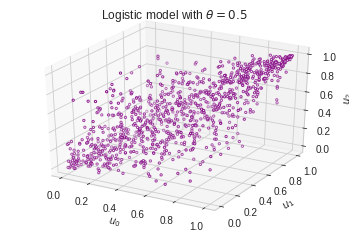

In [22]:
d = 3
theta = 0.5
n_sample = 1000

copula = mv_evd.Logistic(theta = theta, d = d, n_sample = n_sample)
sample = copula.sample_unimargin()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5.0, edgecolor = 'purple', color = 'white')
ax.set_xlabel(r'$u_0$')
ax.set_ylabel(r'$u_1$')
ax.set_zlabel(r'$u_2$')
ax.set_title(r'Logistic model with $\theta = 0.5$')

# References

[1] Alexander J. McNeil, Johanna Nešlehová "Multivariate Archimedean copulas, d-monotone functions and ℓ1-norm symmetric distributions," The Annals of Statistics, Ann. Statist. 37(5B), 3059-3097, (October 2009).

[2] M. Hofert, M. Mächler, A. J. McNeil, Likelihood inference for Archimedean copulas in high dimensions under known margins, J.MultivariateAnal. 110 (2012) 133–150.